In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
import scipy.stats as stats
import warnings
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
import pickle
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('concrete.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
# Checking for duplicated values
print('There are {} duplicated values in the dataset'.format(df.duplicated().sum()))

There are 25 duplicated values in the dataset


In [6]:
# Taking a look at the duplicated rows or samples
df[df.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [7]:
# Dropping the duplicated rows from the dataset
concrete = df.drop_duplicates(keep = 'first')

In [8]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


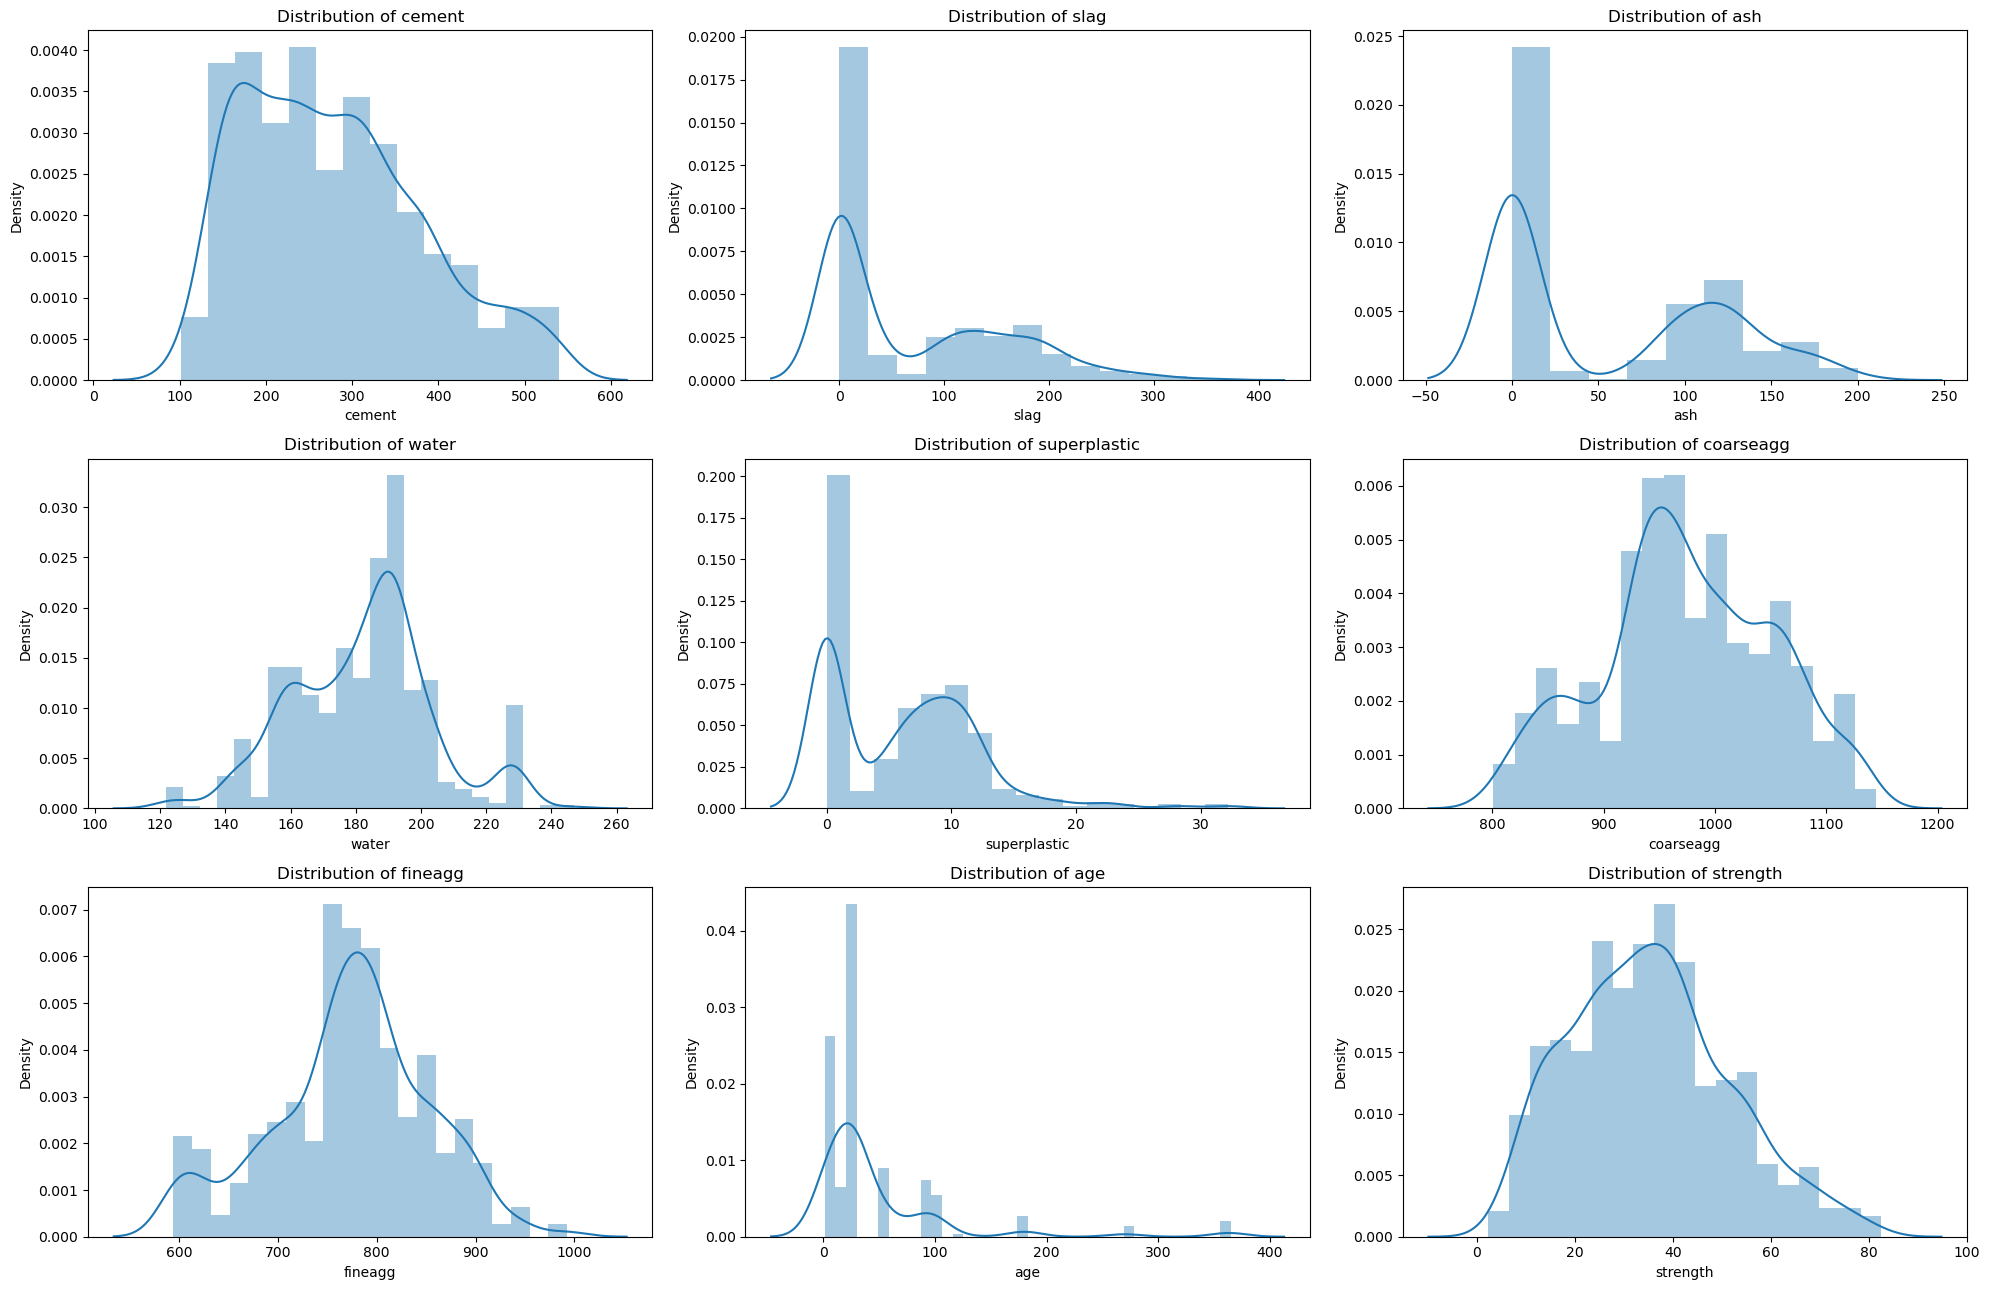

In [9]:
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 13))
for i in concrete:
    plt.subplot(a, b, c)
    plt.title('Distribution of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(concrete[i])
    c = c + 1

plt.tight_layout()
plt.show()

- The distribution of the ash appears to bimodal i.e having two modes. Same with the distribution for the superplastic.
- Superplastic has a hige count of 0.
- The age column has a mode of 28 days which appears to be the median value of the column.
- The distribution of the strength column appears to approximate a normal distribution.

## Hypothesis Testing

### Shapiro-Wilks Test.
- Null Hypothesis: The distribution of all the columns in the dataset approximates a normal or gaussian distribution.
- Alternate hypothesis: The distribution of all the columns in the dataset does not approximates a normal or gaussian distribution.
- Alpha: 0.05

In [10]:
col = []
values = []
for columns in concrete.columns:
    pval = stats.shapiro(concrete[columns])[1]
    col.append(columns)
    values.append(pval)

In [11]:
normality_df = pd.DataFrame(values, index = col, columns = ['p-values'])
normality_df['statement'] = np.where(normality_df['p-values'] > 0.05, 
                                     'Hypothesis Accepted', 'Hypothesis Rejected')

In [12]:
normality_df

,p-values,statement
cement,6.013706e-17,Hypothesis Rejected
slag,3.923780e-33,Hypothesis Rejected
ash,2.351183e-35,Hypothesis Rejected
water,1.266853e-10,Hypothesis Rejected
superplastic,4.269151e-29,Hypothesis Rejected
coarseagg,2.679026e-09,Hypothesis Rejected
fineagg,3.277329e-10,Hypothesis Rejected
age,1.681558e-43,Hypothesis Rejected
strength,6.638498e-10,Hypothesis Rejected


Although the distributions of columns in the dataset seems like a normal distribution, none of them have a normal distribution.

In [13]:
concrete_df = concrete.copy()

In [14]:
bins = [0, 20, 40, 60, 85]
concrete['strength_category'] = pd.cut(concrete['strength'], bins)

## Multivariate EDA

<Axes: >

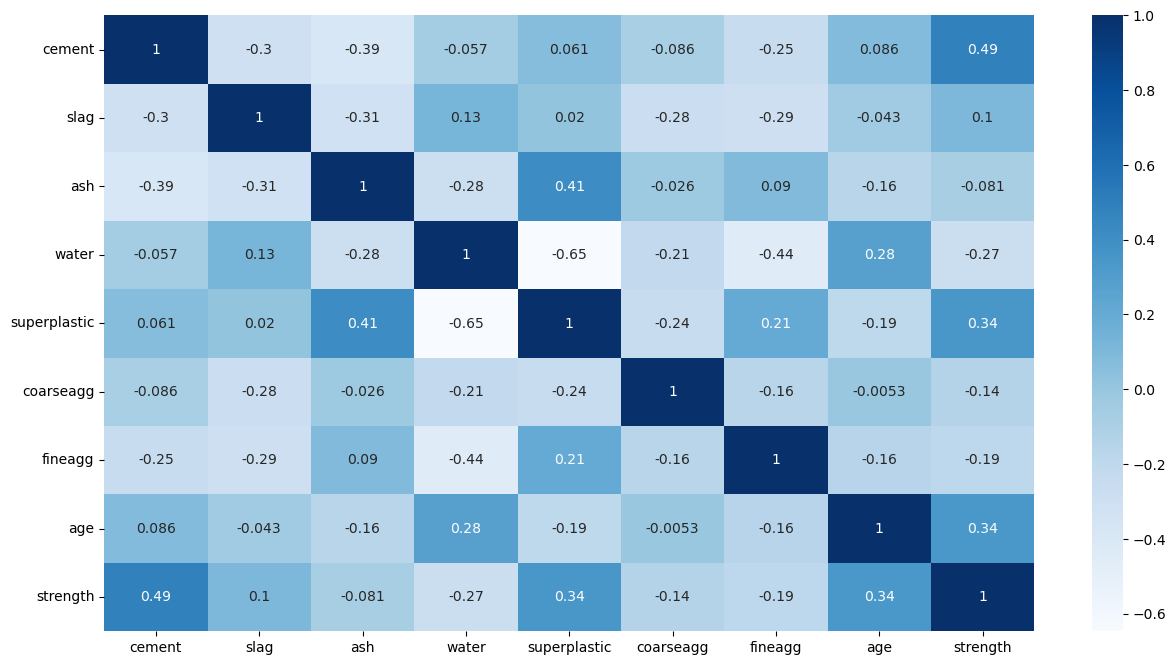

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(concrete.corr(), annot = True, cmap = 'Blues')

- Cement correlates positively with compressive strength as cement is oftern used as a binder for concrete, so therefore, the more the cement content, the more the concrete components are bound.
- Cement is negatively correlated with fly ash content. Fly ash is often used as a substitute to cement.
- Compressive strength increases with superplasticizer content as superplasticizer increases the workability and durability of concrete.

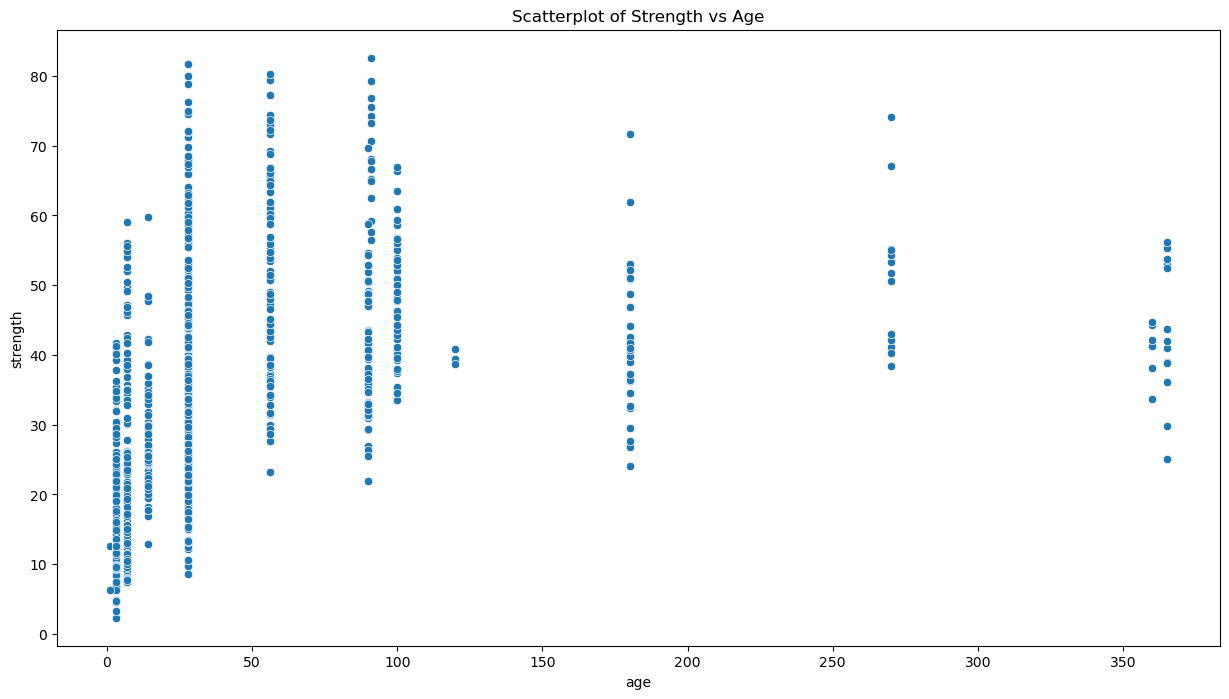

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = concrete, x = 'age', y = 'strength')
plt.title('Scatterplot of Strength vs Age')
plt.show()

From the plot above, the important impact of age on compressive strength. There seems to be a positive correlation between these two variables for up to 28 days, which remained significant up to 52 days. The standard age of concrete is taken as 28 days.

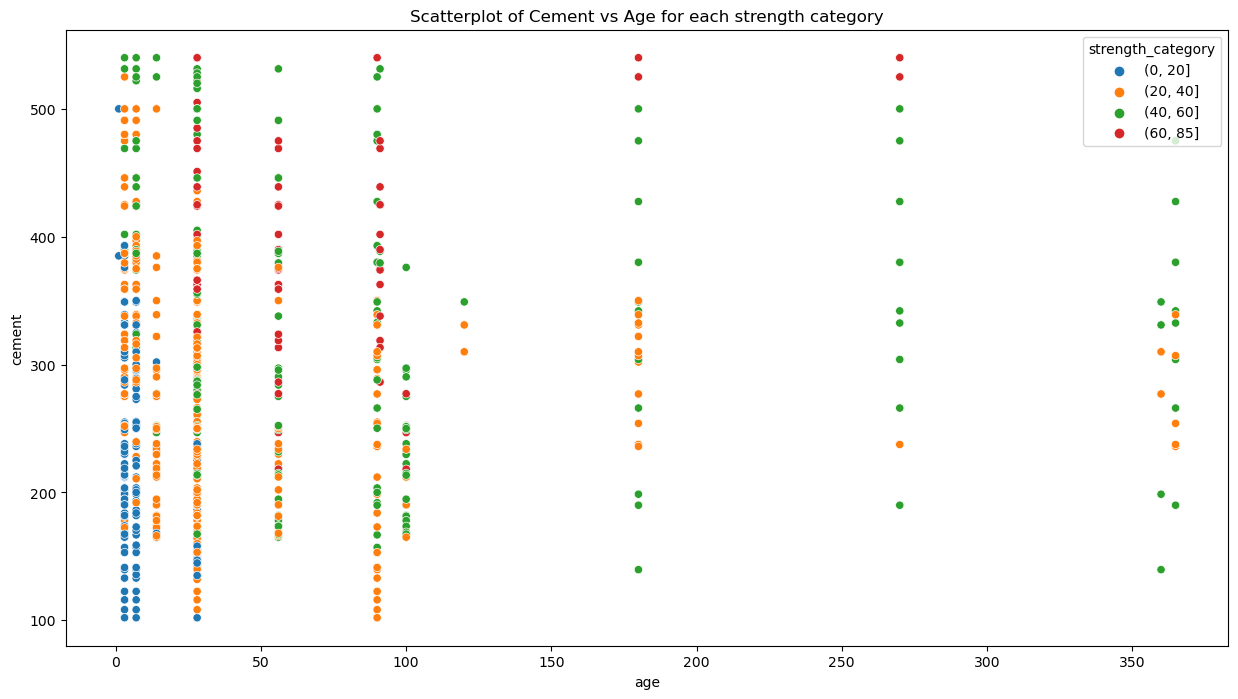

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = concrete, x = 'age', y = 'cement', hue = 'strength_category')
plt.title('Scatterplot of Cement vs Age for each strength category')
plt.show()


The figure above shows the impact of cement content and age on compresive strength. To achieve higher compressive strength even at a lesser age, a high cement content is necessary.

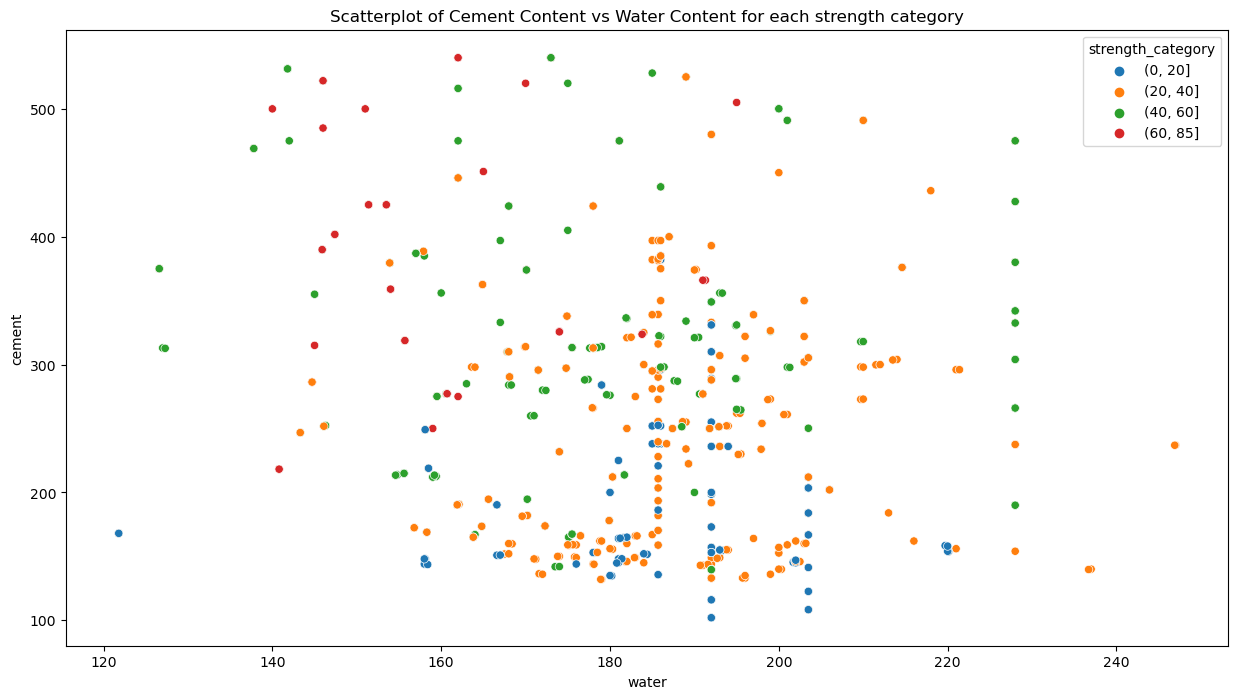

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = concrete, x = 'water', y = 'cement', hue = 'strength_category')
plt.title('Scatterplot of Cement Content vs Water Content for each strength category')
plt.show()

The figure above shows the impact of cement content and water content on compressive strength. Generally, to achieve higher compressive strength, a high cement content and a lower water content is required. Higher water content usually leads to a lower compressive strength.

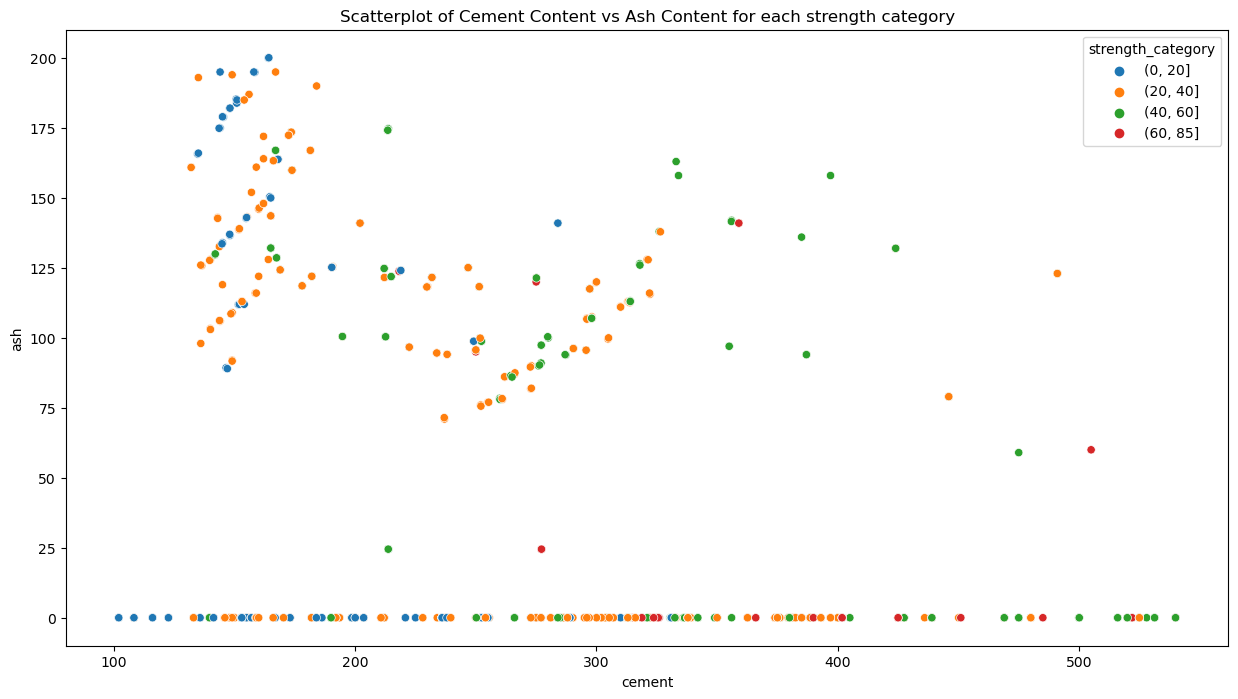

In [19]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = concrete, x = 'cement', y = 'ash', hue = 'strength_category')
plt.title('Scatterplot of Cement Content vs Ash Content for each strength category')
plt.show()

The figure above shows the impact of cement and ash on compressive strength. The fly ash is sometimes used as a substitute for cement  in the concrete making process.For higher compressive strength, a higher cement content and a lower ash content is required. Higher ash content usually leads to lower compressive strength.

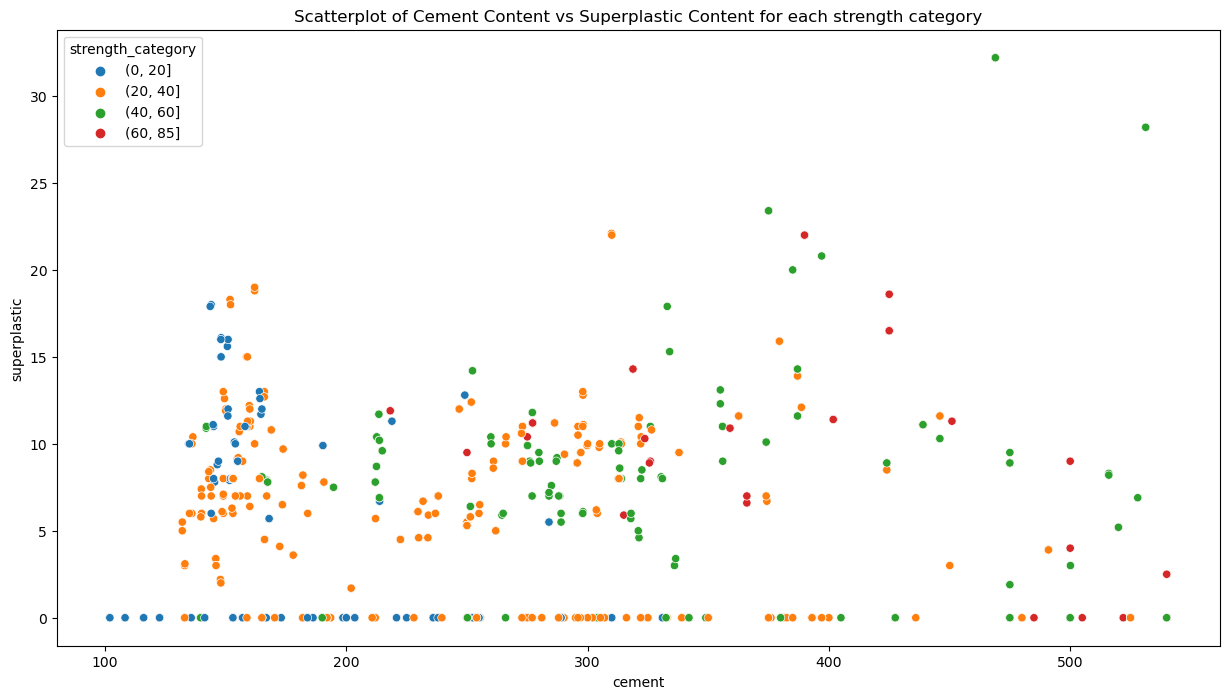

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = concrete, x = 'cement', y = 'superplastic', hue = 'strength_category')
plt.title('Scatterplot of Cement Content vs Superplastic Content for each strength category')
plt.show()

The figure above shows the impact of cement content and superplastic content on compressive strength. Superplasticiazer is added to concrete to make it softer and more durable.Higher cement content and higher superplastic content gives a higher compressive strength.

## Data Preprocessing

In [21]:
x = concrete_df.drop('strength', axis = 1)
y = concrete_df['strength']

In [22]:
#Splitting the data into training and test sets; 80% for training and 20% for testing or validating the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 105)

## Data Modelling



Data modelling will be done with the aid of a pipeline which contains a polynomial feature generator of degrees two, a winsorizer to clip off all underlying outliers and a min- max scaler to normalize the data. The polynomial feature will generate quadratic features which will aid in the data modelling.<br>

METRICS:
- R2 Score: An R-Squared value shows how well the model predicts the outcome of the dependent variable. R-Squared values range from 0 to 1. An R-Squared value of 0 means that the model explains or predicts 0% of the relationship between the dependent and independent variables. A value of 1 indicates that the model predicts 100% of the relationship, and a value of 0.5 indicates that the model predicts 50%, and so on.<br>
- Root Mean Squared Error(RMSE): The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).<br>
- Mean Absolute Percentage Error: Mean absolute percentage error measures the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%.<br>

In [23]:
# Instantiating the polynomial features class(generator)
poly = PolynomialFeatures(degree = 2)

In [24]:
# Initializing the KFold for the cross validation.
kf = KFold(shuffle = True, n_splits = 10)

In [25]:
def cross_validate(model, xtrain, ytrain):
    # Function for the cross validation of models.
    rmse_list = [ ]
    score_list = [ ]
    mape_list = [ ]
    for i, (train_ix, test_ix) in enumerate(kf.split(xtrain, ytrain)):
        X_train, X_test = xtrain.iloc[train_ix], xtrain.iloc[test_ix]
        Y_train, Y_test = ytrain.iloc[train_ix], ytrain.iloc[test_ix]
        # Import the function that computes class weights
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        score = model.score(X_test, Y_test)
        rmse = mean_squared_error(Y_test, predictions, squared = False)
        print('CV Results for Fold {}'.format(i+1))
        print('-' * 50)
        print('Training R2 Score : {}'.format(score))
        print('Training Root Mean Squared Error : {} \n \n'.format(rmse))
        rmse_list.append(rmse)
        score_list.append(score)
    print('Average R2 Score : {}'.format(np.mean(score_list)))
    print('Average RMSE : {}'.format(np.mean(rmse_list)))
    

In [26]:
def modelling(model_name, model , xtest , ytest):
# A function to train and validate the model using evaluation metrics
    model.fit(x_train, y_train)
    pred= model.predict(xtest)
    train_score = model.score(x_train, y_train)
    test_score = model.score(xtest, ytest)
    rmse = mean_squared_error(ytest, pred, squared = False)
    mape = mean_absolute_percentage_error(y_test, pred)
    print('MODEL: {}'.format(model_name))
    print('-' * 80)
    print('Training R2 Score is {}'.format(train_score))
    print('Test R2 Score is {}'.format(test_score))
    print('RMSE is {}'.format(rmse))
    print('MAPE is {}%'.format(round(mape, 2) * 100))

### Linear Regression

In [27]:
lr = LinearRegression()
pipeline_lr = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
     ('lr_regressor', lr)
])

In [28]:
lr_cv = cross_validate(pipeline_lr, x_train, y_train)
lr_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.7849801035527619
Training Root Mean Squared Error : 7.411846290504532 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.8375002998749215
Training Root Mean Squared Error : 6.923919875317968 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.8175992138518133
Training Root Mean Squared Error : 7.183801393982204 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.8040201913108274
Training Root Mean Squared Error : 7.156959711773789 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.7346805711987912
Training Root Mean Squared Error : 8.11991113917401 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.8658967313691406
Training Root Mean Squared Error : 6.1051298

In [29]:
# Validating the cross-validated model on the test set.
modelling('Linear Regression', pipeline_lr, x_test, y_test)

MODEL: Linear Regression
--------------------------------------------------------------------------------
Training R2 Score is 0.8442035130072946
Test R2 Score is 0.7962585069534704
RMSE is 7.2874751888629445
MAPE is 20.0%


The linear regression model has no hyperparameters to tune. Thus, it will serve as a baseline model.

### Decision Tree Regressor

In [30]:
dt = DecisionTreeRegressor(random_state = 105)
pipeline_dt = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
     ('dt_regressor', dt)
])

In [31]:
dt_cv = cross_validate(pipeline_dt, x_train, y_train)
dt_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.8288180585033027
Training Root Mean Squared Error : 7.167743533316216 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.81874360697422
Training Root Mean Squared Error : 6.698559224117702 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.811679748705663
Training Root Mean Squared Error : 7.276811683120908 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.883730714519355
Training Root Mean Squared Error : 5.53180199693855 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.7499695561486774
Training Root Mean Squared Error : 8.09563167530627 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.8266816421964445
Training Root Mean Squared Error : 5.961702672056

The decision tree model performed well and has good performance metrics from the cross validation. On average, the R2 score is 0.805 and its root mean square error is 7.055. Hyperparameter tuning will be carried out to try to improve model's performance.

#### Hyperparameter Tuning For the Decision Tree Model

In [32]:
random_grid = {
"dt_regressor__max_features": [2, 3, 5, 10, 20],
"dt_regressor__max_depth": [5, 7, 9, 11],
"dt_regressor__min_samples_leaf": [2, 3, 5, 7, 9],
"dt_regressor__min_samples_split": [2, 3, 4, 5, 6]
}


In [33]:
random_estimator_dt = RandomizedSearchCV(estimator = pipeline_dt,
param_distributions = random_grid,
scoring = 'r2',
n_jobs = -1,
cv=kf,
verbose = 1,
random_state = 105
)

In [34]:
random_estimator_dt.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('winsorize',
                                              Winsorizer(fold=2, tail='both')),
                                             ('features', PolynomialFeatures()),
                                             ('scale', MinMaxScaler()),
                                             ('dt_regressor',
                                              DecisionTreeRegressor(random_state=105))]),
                   n_jobs=-1,
                   param_distributions={'dt_regressor__max_depth': [5, 7, 9,
                                                                    11],
                                        'dt_regressor__max_features': [2, 3, 5,
                                                                       10, 20],
                                        'dt_regressor__min_samples_leaf': [2, 3,
                                                                           5, 7,
                                                                           9],
                                        'dt_regressor__min_samples_split': [2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6]},
                   random_state=105, scoring='r2', verbose=1)

In [35]:
random_estimator_dt.best_score_

0.8109769443789968

In [36]:
best_dt = random_estimator_dt.best_estimator_

Hyperparameter tuning increased the performance of this model. This model will now be retrained using the whole training set and validated on the test set.

In [37]:
# Validating the cross-validated model on the test set.
modelling('Decision Tree', best_dt, x_test, y_test)

MODEL: Decision Tree
--------------------------------------------------------------------------------
Training R2 Score is 0.9211546172192646
Test R2 Score is 0.8042318329388036
RMSE is 7.143456168199768
MAPE is 21.0%


The tuned decision tree model has been validated on the test set. It has a training score of 0.804, a test score of 0.753 and a root mean squared error of 7.528. It also has a MAPE of 20% meaning on average, it makes a prediction error of about +-20%

### Gradient Boosting 

In [38]:
gdb = GradientBoostingRegressor(random_state = 105)
pipeline_gdb = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
    ('gdb_regressor', gdb)
])

In [39]:
gdb_cv = cross_validate(pipeline_gdb, x_train, y_train)
gdb_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.8886152621212088
Training Root Mean Squared Error : 5.502818522803276 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.9094833551321756
Training Root Mean Squared Error : 5.312380784539366 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.8802491044468935
Training Root Mean Squared Error : 4.851543621220823 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.889484099195909
Training Root Mean Squared Error : 6.078987955575062 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.9201958493930272
Training Root Mean Squared Error : 4.332082731512761 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.9112076420576201
Training Root Mean Squared Error : 4.8905798

The gradient boost model performed well and has good performance metrics from the cross validation. On average, the R2 score is 0.904 which is a difference of 10 from the decision tree model and its root mean square error is 4.998. Hyperparameter tuning will be carried out to try to improve model's performance.

#### Hyperparameter tuning for the gradient boosting model

In [40]:
random_grid = {
"gdb_regressor__n_estimators": [20, 40, 60, 80, 100, 120, 150],
"gdb_regressor__max_features": [2, 3, 5, 10, 20],
"gdb_regressor__max_depth": [5, 7, 9, 11],
"gdb_regressor__min_samples_leaf": [2, 3, 5, 7, 9],
"gdb_regressor__min_samples_split": [2, 3, 4, 5, 6],
"gdb_regressor__min_impurity_decrease": [0.1, 0.2, 0.3, 0.4, 0.5, 1]
}

In [41]:
random_estimator_gdb = RandomizedSearchCV(estimator = pipeline_gdb,
param_distributions = random_grid,
scoring = 'r2',
n_jobs = -1,
cv=kf,
verbose = 1,
random_state = 105
)

In [42]:
random_estimator_gdb.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('winsorize',
                                              Winsorizer(fold=2, tail='both')),
                                             ('features', PolynomialFeatures()),
                                             ('scale', MinMaxScaler()),
                                             ('gdb_regressor',
                                              GradientBoostingRegressor(random_state=105))]),
                   n_jobs=-1,
                   param_distributions={'gdb_regressor__max_depth': [5, 7, 9,
                                                                     11],
                                        'gdb_regressor__max_features': [2, 3, 5,
                                                                        10,
                                                                        20],
                                        'gdb_regressor__min_impurity_decrease': [0.1,
                                                                                 0.2,
                                                                                 0.3,
                                                                                 0.4,
                                                                                 0.5,
                                                                                 1],
                                        'gdb_regressor__min_samples_leaf': [2,
                                                                            3,
                                                                            5,
                                                                            7,
                                                                            9],
                                        'gdb_regressor__min_samples_split': [2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6],
                                        'gdb_regressor__n_estimators': [20, 40,
                                                                        60, 80,
                                                                        100,
                                                                        120,
                                                                        150]},
                   random_state=105, scoring='r2', verbose=1)

In [43]:
random_estimator_gdb.best_score_

0.9174198063180384

In [44]:
best_gdb = random_estimator_gdb.best_estimator_

Hyperparameter tuning increased the performance of the model. Now, we retrain using the whole training set and validate it on the test set.

In [45]:
# Validating the cross-validated model on the test set.
modelling('Gradient Boost', best_gdb, x_test, y_test)

MODEL: Gradient Boost
--------------------------------------------------------------------------------
Training R2 Score is 0.9862013452481209
Test R2 Score is 0.9139017008163561
RMSE is 4.737340849289912
MAPE is 13.0%


The tuned gradient boost model performed well on the test set. It has a training score of 0.915, a test score of 0.913 and a root mean squared error of 4.737. It also has a MAPE of 13% meaning on average, it makes a prediction error of about +-13%

### Random Forest

In [46]:
rf = RandomForestRegressor(random_state = 105)
pipeline_rf = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
    ('rf_regressor', rf)
])

In [47]:
rf_cv = cross_validate(pipeline_rf, x_train, y_train)
rf_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.9192038198380086
Training Root Mean Squared Error : 4.222111831916221 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.8806963738927627
Training Root Mean Squared Error : 5.624640044888953 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.8406626500793166
Training Root Mean Squared Error : 6.194409408793779 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.9114380351097873
Training Root Mean Squared Error : 4.712956288902713 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.9324725238021302
Training Root Mean Squared Error : 4.510938306380181 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.8680692513036605
Training Root Mean Squared Error : 5.945617

Hyperparameter tuning will be carried out to determine the optimum hyperparameters for the model.

In [48]:
random_grid = {
"rf_regressor__n_estimators": [20, 40, 60, 80, 100, 120, 150],
"rf_regressor__max_features": [2, 3, 5, 10, 20],
"rf_regressor__max_depth": [5, 7, 9, 11],
"rf_regressor__min_samples_leaf": [2, 3, 5, 7, 9],
"rf_regressor__min_samples_split": [2, 3, 4, 5, 6],
"rf_regressor__min_impurity_decrease": [0.1, 0.2, 0.3, 0.4, 0.5, 1],
"rf_regressor__max_leaf_nodes": [2, 3, 5, 7, 9, 11, 15]    
}

In [49]:
random_estimator_rf = RandomizedSearchCV(estimator = pipeline_rf,
param_distributions = random_grid,
scoring = 'r2',
n_jobs = -1,
cv=kf,
verbose = 1,
random_state = 105
)

In [50]:
random_estimator_rf.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('winsorize',
                                              Winsorizer(fold=2, tail='both')),
                                             ('features', PolynomialFeatures()),
                                             ('scale', MinMaxScaler()),
                                             ('rf_regressor',
                                              RandomForestRegressor(random_state=105))]),
                   n_jobs=-1,
                   param_distributions={'rf_regressor__max_depth': [5, 7, 9,
                                                                    11],
                                        'rf_regressor__max_features': [2, 3, 5,
                                                                       10, 20],
                                        'rf_regressor__max_leaf_nodes': [2, 3,
                                                                         5, 7,
                                                                         9, 11,
                                                                         15],
                                        'rf_regressor__min_impurity_decrease': [0.1,
                                                                                0.2,
                                                                                0.3,
                                                                                0.4,
                                                                                0.5,
                                                                                1],
                                        'rf_regressor__min_samples_leaf': [2, 3,
                                                                           5, 7,
                                                                           9],
                                        'rf_regressor__min_samples_split': [2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6],
                                        'rf_regressor__n_estimators': [20, 40,
                                                                       60, 80,
                                                                       100, 120,
                                                                       150]},
                   random_state=105, scoring='r2', verbose=1)

In [51]:
random_estimator_rf.best_score_

0.8135342098944539

Hyperparameter tuning did not give the optimum results as the original model performed better than the tuned model. Validation of model will be done using the test set.

In [52]:
# Validating the cross-validated model on the test set.
modelling('Random Forest', pipeline_rf, x_test, y_test)

MODEL: Random Forest
--------------------------------------------------------------------------------
Training R2 Score is 0.9834499562644735
Test R2 Score is 0.8782189844868218
RMSE is 5.634133620156542
MAPE is 15.0%


The original random forest model performed well on the test set. It has a training score of 0.886, a test score of 0.866 and a root mean squared error of 5.900. It also has a MAPE of 16% meaning on average, it makes a prediction error of about +-16%

### K-Nearest-Neighbors

In [53]:
knn = KNeighborsRegressor()
pipeline_knn = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
    ('knn_regressor', knn)
])

In [54]:
knn_cv = cross_validate(pipeline_knn, x_train, y_train)
knn_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.7600529935496553
Training Root Mean Squared Error : 7.932011741771752 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.8130458950388697
Training Root Mean Squared Error : 7.664560921765629 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.7547431116570879
Training Root Mean Squared Error : 7.8485819620371435 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.732401008807542
Training Root Mean Squared Error : 8.755165538408642 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.7653202241085612
Training Root Mean Squared Error : 8.330772581219582 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.7196374040729623
Training Root Mean Squared Error : 8.470231

The KNN model has a good performance metrics from the cross validation. On average, the R2 score is 0.718 and its root mean square error is 8.493. Hyperparameter tuning will be carried out to try to improve model's performance.

#### Hyperparameter tuning of the KNN Model.

In [55]:
random_grid = {
"knn_regressor__n_neighbors": range(1, 10, 1),
"knn_regressor__weights": ['uniform', 'distance'],
"knn_regressor__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
"knn_regressor__p": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"knn_regressor__metric": ['cityblock', 'cosine', 'euclidean', 'haversine', 'l1', 'l2', 'manhattan']
}
random_estimator_knn = RandomizedSearchCV(estimator = pipeline_knn,
param_distributions=random_grid,
scoring='r2',
n_jobs=-1,
cv=kf,
verbose=1,
random_state=1
)

In [56]:
random_estimator_knn.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('winsorize',
                                              Winsorizer(fold=2, tail='both')),
                                             ('features', PolynomialFeatures()),
                                             ('scale', MinMaxScaler()),
                                             ('knn_regressor',
                                              KNeighborsRegressor())]),
                   n_jobs=-1,
                   param_distributions={'knn_regressor__algorithm': ['auto',
                                                                     'ball_tree',
                                                                     'kd_tree',
                                                                     'brute'],
                                        'knn_regressor__metric': ['cityblock',
                                                                  'cosine',
                                                                  'euclidean',
                                                                  'haversine',
                                                                  'l1', 'l2',
                                                                  'manhattan'],
                                        'knn_regressor__n_neighbors': range(1, 10),
                                        'knn_regressor__p': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'knn_regressor__weights': ['uniform',
                                                                   'distance']},
                   random_state=1, scoring='r2', verbose=1)

In [57]:
random_estimator_knn.best_score_

0.7724470724891981

In [58]:
best_knn = random_estimator_knn.best_estimator_

Hyperparameter tuning improved the model's performance. The tuned model will be tained on the whole training set and validated on the test set.

In [59]:
# Validating the cross-validated model on the test set.
modelling('KNN', best_knn, x_test, y_test)

MODEL: KNN
--------------------------------------------------------------------------------
Training R2 Score is 0.995954115843533
Test R2 Score is 0.7798309672434967
RMSE is 7.575572593307695
MAPE is 23.0%


After validating the KNN model on the test set, the above performance metrics is obtained. The training score is 0.77, the test score is 0.779 and its root mean square error is 7.576. It also has a MAPE of 23%.

### Extreme Gradient Boosting

In [60]:
xgb = XGBRegressor(random_state = 105)
pipeline_xgb = Pipeline(steps=[
    ('winsorize', Winsorizer(capping_method = 'gaussian', tail = 'both', fold = 2)),
    ('features', PolynomialFeatures(degree = 2)),
    ('scale',MinMaxScaler()),
    ('xgb_regressor', xgb)
])

In [61]:
xgb_cv = cross_validate(pipeline_xgb, x_train, y_train)
xgb_cv

CV Results for Fold 1
--------------------------------------------------
Training R2 Score : 0.8986275115636354
Training Root Mean Squared Error : 5.1605009449241255 
 

CV Results for Fold 2
--------------------------------------------------
Training R2 Score : 0.9102426546949426
Training Root Mean Squared Error : 5.140744548535634 
 

CV Results for Fold 3
--------------------------------------------------
Training R2 Score : 0.8765066452150525
Training Root Mean Squared Error : 5.460404802701338 
 

CV Results for Fold 4
--------------------------------------------------
Training R2 Score : 0.8667347541905959
Training Root Mean Squared Error : 6.3999145516216345 
 

CV Results for Fold 5
--------------------------------------------------
Training R2 Score : 0.9065556599168548
Training Root Mean Squared Error : 4.809426466204361 
 

CV Results for Fold 6
--------------------------------------------------
Training R2 Score : 0.9060738782551268
Training Root Mean Squared Error : 5.1149

The KNN model has a good performance metrics from the cross validation. On average, the R2 score is 0.908 and its root mean square error is 4.874. Hyperparameter tuning will be carried out to try to improve model's performance.

#### Hyperparameter tuning for the XGBoost Model

In [62]:
random_grid = {
    'xgb_regressor__n_estimators':[100, 200, 300, 400, 500],
    'xgb_regressor__min_child_weight':[4,5], 
    'xgb_regressor__gamma':[i/10.0 for i in range(3,6)],  
    'xgb_regressor__subsample':[i/10.0 for i in range(6,11)],
    'xgb_regressor__colsample_bytree':[i/10.0 for i in range(6,11)], 
    'xgb_regressor__max_depth': [2,3,4,6,7],
    'xgb_regressor__objective': ['reg:squarederror', 'reg:tweedie'],
    'xgb_regressor__booster': ['gbtree', 'gblinear'],
    'xgb_regressor__eval_metric': ['rmse'],
    'xgb_regressor__eta': [i/10.0 for i in range(3,6)],
}
random_estimator_xgb = RandomizedSearchCV(estimator = pipeline_xgb,
param_distributions=random_grid,
scoring='r2',
n_jobs=-1,
cv=kf,
verbose=1,
random_state=1
)

In [63]:
random_estimator_xgb.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('winsorize',
                                              Winsorizer(fold=2, tail='both')),
                                             ('features', PolynomialFeatures()),
                                             ('scale', MinMaxScaler()),
                                             ('xgb_regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_s...
                                        'xgb_regressor__eval_metric': ['rmse'],
                                        'xgb_regressor__gamma': [0.3, 0.4, 0.5],
                                        'xgb_regressor__max_depth': [2, 3, 4, 6,
                                                                     7],
                                        'xgb_regressor__min_child_weight': [4,
                                                                            5],
                                        'xgb_regressor__n_estimators': [100,
                                                                        200,
                                                                        300,
                                                                        400,
                                                                        500],
                                        'xgb_regressor__objective': ['reg:squarederror',
                                                                     'reg:tweedie'],
                                        'xgb_regressor__subsample': [0.6, 0.7,
                                                                     0.8, 0.9,
                                                                     1.0]},
                   random_state=1, scoring='r2', verbose=1)

In [64]:
random_estimator_xgb.best_score_

0.9080633718189572

In [65]:
best_xgb = random_estimator_xgb.best_estimator_

Hyperparameter tuning improved the performance of the model. This tuned model will now be trained using the whole training set and validated using the test set.

In [66]:
# Validating the cross-validated model on the test set.
modelling('XGBoost', best_xgb, x_test, y_test)

MODEL: XGBoost
--------------------------------------------------------------------------------
Training R2 Score is 0.9942440373781327
Test R2 Score is 0.9215894507343693
RMSE is 4.520896817080585
MAPE is 12.0%


The tuned XGboost model has been validated on the test set. It has a training score of 0.918, a test score of 0.922 and a root mean squared error of 4.521. It also has a MAPE of 12% meaning on average, it makes a prediction error of about +-12%

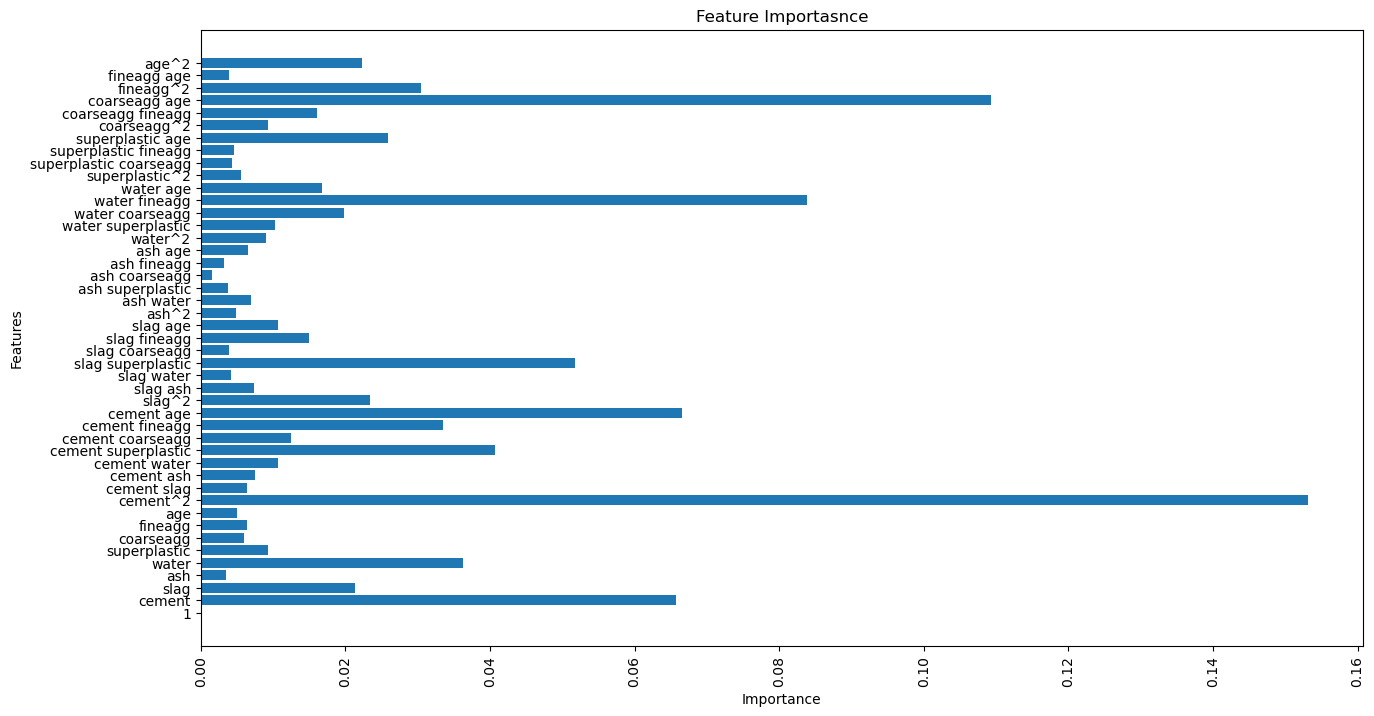

In [73]:
# feature importance
plt.figure(figsize=(15, 8))
plt.barh(best_xgb['features'].get_feature_names_out(), best_xgb['xgb_regressor'].feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance plot')
plt.show()

From the feature importance plot, the most important feature in deciding concrete strength is the square of the cement value. This shows that the engineered polynomial features has inflated the feature importance of the engineered features. The 'cement^2' feature is not in the original dataset but is a polynomial feature gotten from the poly features class in the pipeline. From the original features in the dataset, the three most important features for concrete strength prediction are cement, water and the slag features. This can be seen from the lower section of the chart.

The winner model is the tuned xgboost model using the sklearn pipeline with: <br>
R2 Score: 0.92<br>
RMSE: 4.520896817080585<br>
MAPE: 12.0%<br>

In [69]:
directory = open(r'concrete_model_.pkl', 'wb')
pickle.dump(best_xgb, directory)
directory.close()